In [49]:
import pandas as pd
import numpy as np

import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [50]:
dataset_number = 2

train = pd.read_csv(f'data/preproc_data/train_{dataset_number}.csv')
test = pd.read_csv(f'data/preproc_data/test_{dataset_number}.csv')

In [51]:
X_train = train.drop(columns='Survived')
y_train = pd.DataFrame(train['Survived'])

X_train.head()

,Unnamed: 0,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Single,SmallF,MedF,LargeF
0,0,1,3,1,22.0,1.981001,0,0,2,0,1,0,0
1,1,2,1,0,38.0,4.266662,3,1,1,0,1,0,0
2,2,3,3,0,26.0,2.070022,0,0,1,1,0,0,0
3,3,4,1,0,35.0,3.972177,3,0,1,0,1,0,0
4,4,5,3,1,35.0,2.085672,0,0,2,1,0,0,0


In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1, 1],
}

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((704, 13), (177, 13), (704, 1), (177, 1))

In [54]:
# y_train = y_train.values.ravel()

# (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [55]:
xgb_clf = XGBClassifier(random_state=42)

# Set up the GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost.

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.1s


/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost.

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree

/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost.

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree

/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/root/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost.

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.01, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=

In [56]:
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

y_train_int = y_train.astype(int)
majority_class = np.bincount(y_train_int).argmax()
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

ValueError: object too deep for desired array

,precision,recall,f1-score,support
0.0,0.83,0.90,0.86,106.00
1.0,0.83,0.73,0.78,71.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.83,0.81,0.82,177.00
weighted avg,0.83,0.83,0.83,177.00


"Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'subsample': 0.6}"

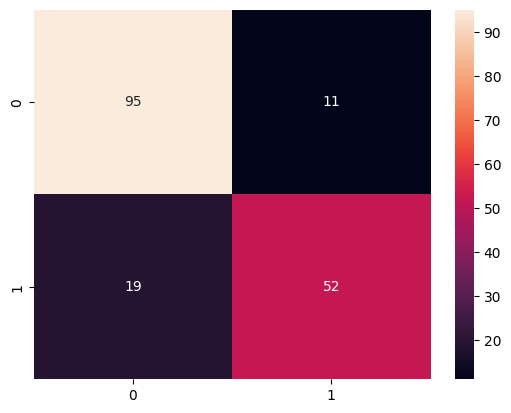

In [57]:
display(heatmap = sns.heatmap(conf_matrix, annot=True))
display(report_df)
display(f'Best Params: {best_params}')

# Results

In [58]:
display(f'The XGB Classifier correctly identifies {conf_matrix[0][0]}/{conf_matrix[0][0]+conf_matrix[0][1]} of passengers who perished, while correctly identifying {conf_matrix[1][1]}/{conf_matrix[1][0]+conf_matrix[1][1]} passengers that survived.')

'The XGB Classifier correctly identifies 95/106 of passengers who perished, while correctly identifying 52/71 passengers that survived.'

In [59]:
best_xgb_clf = grid_search.best_estimator_

# Get feature importances
importances = best_xgb_clf.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X is your DataFrame containing features

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features (adjust as needed)
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

Top 10 Most Important Features:
     Feature  Importance
8      Title    0.301120
3        Sex    0.260537
2     Pclass    0.081047
12    LargeF    0.076010
6      Cabin    0.043933
5       Fare    0.037791
7   Embarked    0.037641
11      MedF    0.036714
10    SmallF    0.033886
4        Age    0.028453


# Make Predictions

In [60]:
predictions = best_xgb_clf.predict(test)
predictions_int = predictions.astype(int)

# Create Submission File

In [61]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions_int
})

# Save the submission DataFrame to a CSV file
submission.to_csv(f'submissions/XGB_train_test_data_{dataset_number}.csv', index=False)
display("Submission file generated successfully.")

'Submission file generated successfully.'